<a href="https://colab.research.google.com/github/subhayughoshal/MOVIE-GENRE-CLASSIFICATION/blob/main/MOVIE_GENRE_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [7]:
from zipfile import ZipFile
import os

# Upload your archive.zip before running this
zip_path = "/content/archive.zip"
extract_path = "/content/data"

with ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_path)


In [8]:
import pandas as pd

def parse_file(filepath, has_genre=True):
    rows = []
    with open(filepath, 'r', encoding='utf-8') as f:
        for line in f:
            parts = line.strip().split(" ::: ")
            if has_genre and len(parts) >= 4:
                rows.append({
                    "id": parts[0],
                    "title": parts[1],
                    "genre": parts[2],
                    "description": " ::: ".join(parts[3:])
                })
            elif not has_genre and len(parts) >= 3:
                rows.append({
                    "id": parts[0],
                    "title": parts[1],
                    "description": " ::: ".join(parts[2:])
                })
    return pd.DataFrame(rows)

base_path = "/content/data/Genre Classification Dataset"
train_df = parse_file(os.path.join(base_path, "train_data.txt"), has_genre=True)
test_df = parse_file(os.path.join(base_path, "test_data.txt"), has_genre=False)
solution_df = parse_file(os.path.join(base_path, "test_data_solution.txt"), has_genre=True)


In [9]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer(stop_words='english', max_features=5000)
X_train = vectorizer.fit_transform(train_df["description"])
X_test = vectorizer.transform(test_df["description"])
y_train = train_df["genre"]


In [10]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
test_df["predicted_genre"] = y_pred


In [11]:
from sklearn.metrics import classification_report

test_df["predicted_genre"] = y_pred
solution_df["true_genre"] = solution_df["genre"]

print("📊 Classification Report:")
print(classification_report(solution_df["true_genre"], y_pred))

# Optional: Compare predictions
result_df = test_df.copy()
result_df["true_genre"] = solution_df["genre"]
result_df[["title", "predicted_genre", "true_genre"]]


📊 Classification Report:


/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


              precision    recall  f1-score   support

      action       0.48      0.29      0.36      1314
       adult       0.60      0.24      0.34       590
   adventure       0.59      0.17      0.26       775
   animation       0.52      0.07      0.12       498
   biography       0.00      0.00      0.00       264
      comedy       0.53      0.58      0.55      7446
       crime       0.37      0.04      0.08       505
 documentary       0.67      0.85      0.75     13096
       drama       0.54      0.77      0.64     13612
      family       0.50      0.09      0.15       783
     fantasy       0.56      0.06      0.10       322
   game-show       0.90      0.51      0.65       193
     history       0.00      0.00      0.00       243
      horror       0.64      0.57      0.60      2204
       music       0.67      0.45      0.54       731
     musical       0.33      0.02      0.04       276
     mystery       0.36      0.02      0.03       318
        news       0.69    

/usr/local/lib/python3.11/dist-packages/sklearn/metrics/_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


,title,predicted_genre,true_genre
0,Edgar's Lunch (1998),short,thriller
1,La guerra de papá (1977),drama,comedy
2,Off the Beaten Track (2010),documentary,documentary
3,Meu Amigo Hindu (2015),drama,drama
4,Er nu zhai (1955),drama,drama
...,...,...,...
54195,"""Tales of Light & Dark"" (2013)",drama,horror
54196,Der letzte Mohikaner (1965),action,western
54197,Oliver Twink (2007),comedy,adult
54198,Slipstream (1973),drama,drama


In [12]:
from sklearn.metrics import accuracy_score

# Compare predicted genres to true genres
accuracy = accuracy_score(solution_df["genre"], test_df["predicted_genre"])
print(f"✅ Model Accuracy: {accuracy:.2%}")


✅ Model Accuracy: 58.37%


In [13]:
import pandas as pd

# Create a comparison DataFrame
comparison = pd.DataFrame({
    "true_genre": solution_df["genre"],
    "predicted_genre": test_df["predicted_genre"]
})

# Group by true genre and compute per-class accuracy
genre_accuracy = comparison.groupby("true_genre").apply(
    lambda df: (df["true_genre"] == df["predicted_genre"]).sum() / len(df)
).reset_index(name="accuracy")

# Display result
print("🎯 Accuracy per Genre:")
display(genre_accuracy)


🎯 Accuracy per Genre:


/tmp/ipython-input-13-1559361201.py:10: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  genre_accuracy = comparison.groupby("true_genre").apply(


,true_genre,accuracy
0,action,0.289193
1,adult,0.237288
2,adventure,0.167742
3,animation,0.066265
4,biography,0.000000
5,comedy,0.577223
6,crime,0.043564
7,documentary,0.849801
8,drama,0.770864
9,family,0.090677


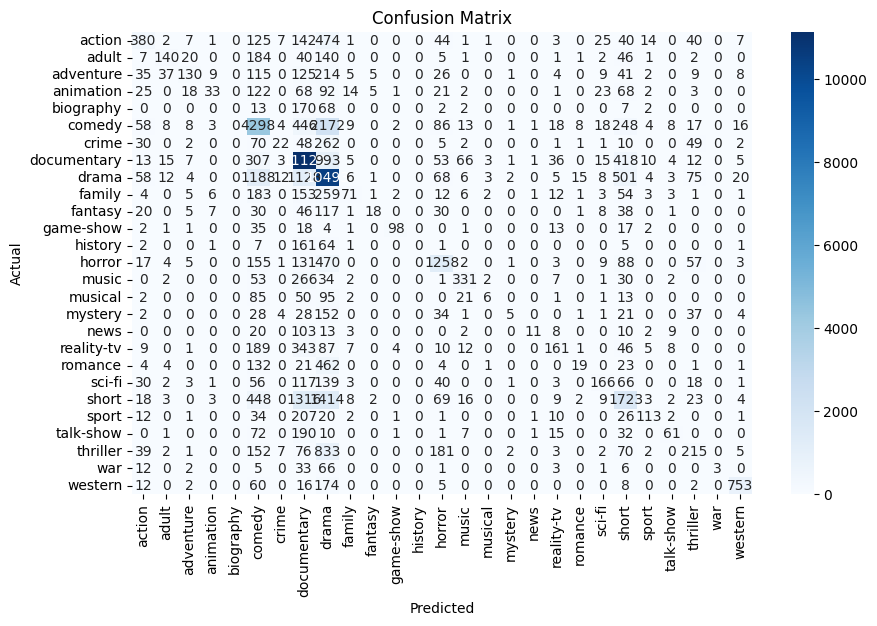

In [14]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

cm = confusion_matrix(solution_df["genre"], test_df["predicted_genre"], labels=model.classes_)
plt.figure(figsize=(10, 6))
sns.heatmap(cm, annot=True, fmt='d', xticklabels=model.classes_, yticklabels=model.classes_, cmap="Blues")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()
